In [1]:
import matplotlib
import matplotlib.patches as patches
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

colors = ["#67af4a", "#cc693d", "#688bcd",
          "#c949a4", "#4aac8d", "#c74d63",
          "#caa941", "#8762cb", "#c478ad", "#85803b"]

sys.path.append("..")
from analysis.calibration.plot_fragment_to_dist import output_calibrated_dist, get_centroid, euclidean_dist

### TERC

Obtain the inferred physical distance using the coordinates of each chimeric read: 3' end of the first chimeric segment and 5' end of the second chimeric segment

In [4]:
f_dir = "/mnt/chenga/projects/rnarna/analysis/validation/pdb/"
f_centroids = f_dir + "sekne_TERC/sekne_TERC_centroid.txt"

f_G1_pairs  = "../data/pairs/se/hrefseq/MAPQ1_SPAN0/G1_kethoxal-K562_M15_R01.dedup.txt.gz"
f_G7_pairs  = "../data/pairs/se/hrefseq/MAPQ1_SPAN0/G7_kethoxal-K562_M18_R01.dedup.txt.gz"

f_G1_output = "../analysis/calibration/inner/G1_kethoxal-K562_M15_R01_TERC.dist"
f_G7_output = "../analysis/calibration/inner/G7_kethoxal-K562_M18_R01_TERC.dist"

p_chrom = "NR_001566"

if not os.path.exists(f_G1_output):
    output_calibrated_dist(p_chrom, f_centroids, f_G1_pairs, f_G1_output)
if not os.path.exists(f_G7_output):
    output_calibrated_dist(p_chrom, f_centroids, f_G7_pairs, f_G7_output)

Load inferred physical distance results from KARR-seq samples, as well as all physical distance from the original cryoEM

In [5]:
distances_TERC_G1 = []
distances_TERC_G7 = []
distances_TERC = []

# Load distances from G1
with open(f_G1_output, "r") as f:
    for line in f:
        row = line.strip("\r\n").split("\t")
        if float(row[6]) != 0.0:
            distances_TERC_G1.append(float(row[6]))

# Load distances from G7
with open(f_G7_output, "r") as f:
    for line in f:
        row = line.strip("\r\n").split("\t")
        if float(row[6]) != 0.0:
            distances_TERC_G7.append(float(row[6]))

# Load distances from cryoEM structure
centroid = get_centroid(f_centroids)
for i in np.arange(1, max(centroid.keys()), step=1):
    for j in np.arange(1, i, step=1):
        try:
            d = euclidean_dist(centroid[i], centroid[j])
            if d != 0:
                distances_TERC.append(d)
        except KeyError:
            continue

Plot figure

Text(0.5, 1.0, 'TERC')

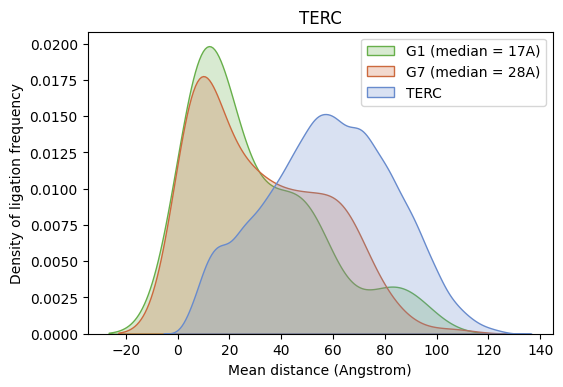

In [6]:
median_TERC_G1 = np.percentile(distances_TERC_G1, 50).astype(int)
median_TERC_G7 = np.percentile(distances_TERC_G7, 50).astype(int)

plt.figure(dpi=100)
sns.kdeplot(distances_TERC_G1, shade=True, label="G1 (median = %sA)" % median_TERC_G1,color=colors[0])
sns.kdeplot(distances_TERC_G7, shade=True, label="G7 (median = %sA)" % median_TERC_G7, color=colors[1])
sns.kdeplot(distances_TERC, shade=True, label="TERC", color=colors[2])
plt.legend()
plt.xlabel("Mean distance (Angstrom)")
plt.ylabel("Density of ligation frequency")
plt.title("TERC")